# GRIP : The Spark Foundation 

## Data Scicence and Business Analysis intern

## Author : Ishwer Kumar Yadav

#### Task-6 : Prediction using Decision Tree Algorithm

###### In this task we have to create the decision tree classifier and visulaize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class acccordingly.

###### Data - Iris Dataset
links- https://bit.ly/3kXTdox

#### Importing Libraries

In [4]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Reading Data

In [13]:
data = pd.read_csv("C:\\Users\\Babbu\\Desktop\\Iris.csv")

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
data.shape

(150, 6)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
#Unique value in each columns
for i in data.columns:
    print(i, "\t\t",len(data[i].unique()))

Id 		 150
SepalLengthCm 		 35
SepalWidthCm 		 23
PetalLengthCm 		 43
PetalWidthCm 		 22
Species 		 3


In [21]:
list_coulmns = data.columns
list_coulmns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

##### Find Avg, Min and Max etc..for continuous variable

In [22]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Visual Analysis

Text(0.5, 1.0, 'Visualize average, number of Min,Max,Std,Queartile')

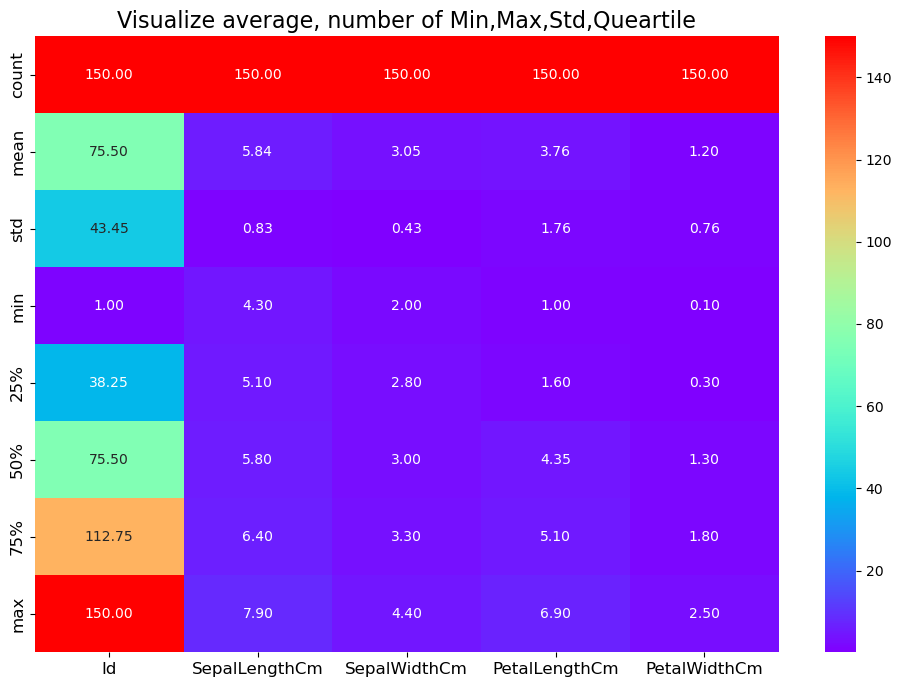

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe(), annot=True,fmt='.2f',cmap='rainbow')
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)
plt.title("Visualize average, number of Min,Max,Std,Queartile",fontsize=16)

##### Relationship between the data

In [25]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Visualize Avg, Number of Min,Max,Std,Quertile')

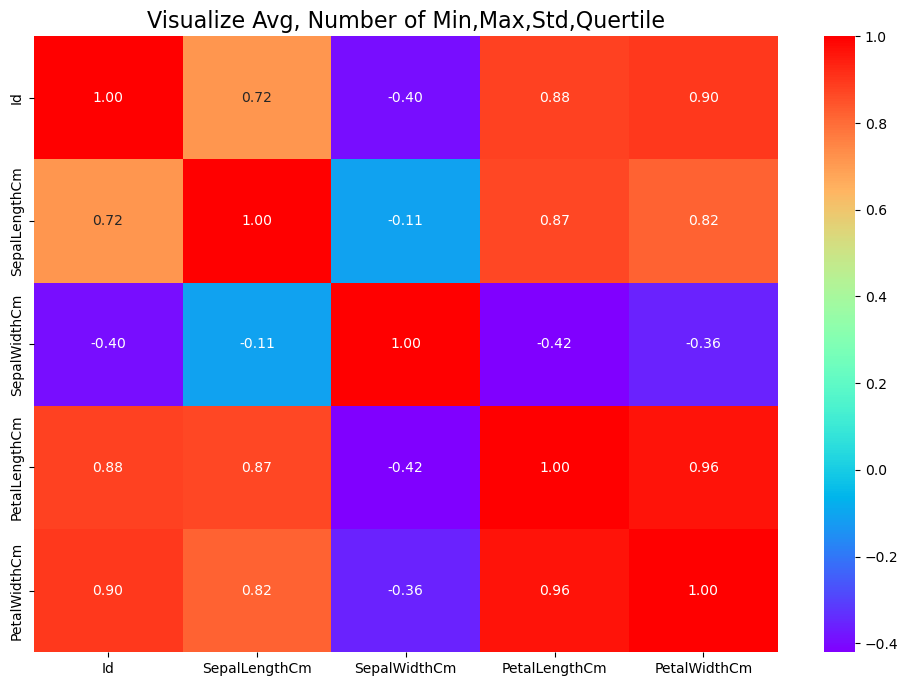

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot =True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.title("Visualize Avg, Number of Min,Max,Std,Quertile",fontsize=16)


##### Checking missing value

In [33]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing value

##### Encoding categorical variable

In [36]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [40]:
from sklearn import preprocessing
data['Species'] = preprocessing.LabelEncoder().fit_transform(data['Species'])

In [41]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
Speccies           int32
dtype: object

##### Still dependent and independent  data

In [70]:
X = data.iloc[:,1:5].values
y = data.iloc[:,-1].values

##### Splitting data datasets into the training set and test set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### The decision tree algorithm

##### Training the decisions tree classification model on the training set

In [73]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train, y_train)

print("The Decision tree classifications model trained")

The Decision tree classifications model trained


##### Visualize The Decision Tree

In [77]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train, y_train)

In [79]:
#text graph represention

text_representation = tree.export_text(classifier_tree)
print(text_representation)

|--- feature_2 <= -0.78
|   |--- class: 0
|--- feature_2 >  -0.78
|   |--- feature_3 <= 0.70
|   |   |--- feature_2 <= 0.71
|   |   |   |--- feature_0 <= -1.00
|   |   |   |   |--- feature_1 <= -1.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -1.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  -1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 2
|   |--- feature_3 >  0.70
|   |   |--- feature_2 <= 0.60
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 2



[Text(0.5, 0.9166666666666666, 'X[2] <= -0.783\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.75, 'X[3] <= 0.701\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(0.4, 0.5833333333333334, 'X[2] <= 0.711\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= -0.999\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.2, 0.25, 'X[1] <= -1.453\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 0.6\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 0.078\ngini = 0.5\nsamples = 2\nvalue

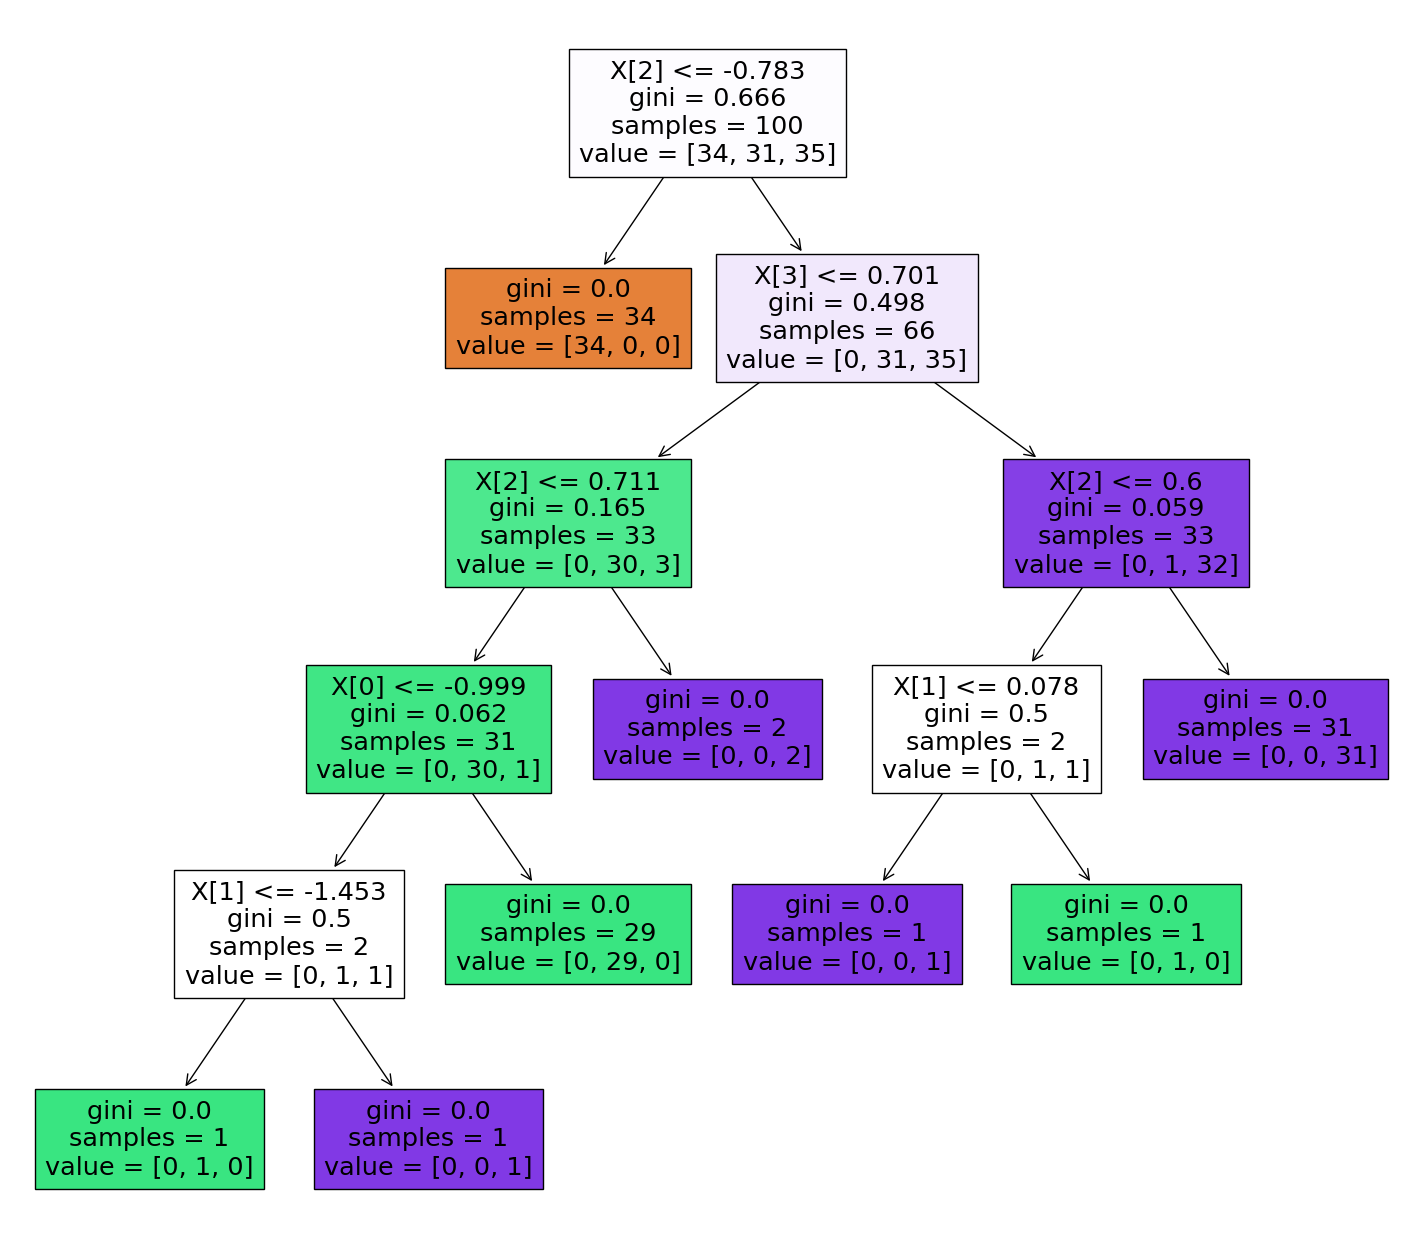

In [80]:
#decision tree plot

plt.figure(figsize=(18, 16))
tree.plot_tree(classifier_tree, filled=True, impurity=True)

##### Making predictions OR predicting the test set

In [81]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

##### Accuracy of our model

In [82]:
print("Accuracy score :", np.mean(y_pred==y_test))

Accuracy score : 0.96


##### Making the Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


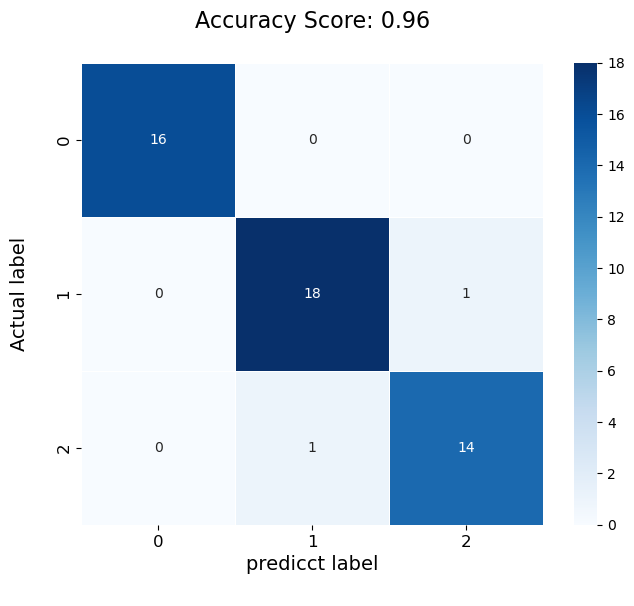

In [86]:
# plot confusion matrix

score = np.mean(y_pred==y_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues');
plt.title('Accuracy Score: {}\n'.format(score),size = 16);
plt.xlabel('predicct label\n',fontsize=14);
plt.ylabel('Actual label\n',fontsize=14);
plt.tick_params(labelsize=12)
plt.show()

In [87]:
cm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model :", cm_accuracy)

Accuracy of model : 0.96


##### classification_report

In [88]:
from sklearn import metrics
print(metrics.classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Conclusion

This classifier model can predict the Species of the flower with 96 % percent accuarcy score